<h1> Bank Data Analysis </h1>

<h2> 1) Libraries </h2>

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    fbeta_score,
    make_scorer,
    recall_score,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

plt.style.use("tableau-colorblind10")

<h2> 2) Data Importation </h2>

In [40]:
data = pd.read_csv('data/bank_data.csv', header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Here my conclusion for bank strategies and customers segmentation: <br>
<ul>
    <li>Deposit: Attract new customers</li>
    <li>Loan: To increase the actual customers consumption</li>
    <li>Housing: A combination of the 2 variables above</li>
</ul>

<h2> 3) Splitting Data </h2>

In [41]:
X = data.iloc[:, :16]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h2> 4) Checking Data Type </h2>

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Observations: <br>
<ul>
    <li> 11162 rows </li>
    <li> 17 variables </li>
    <li> 7 as int64 </li>
    <li> 10 as object </li>
<ul> 

We will have to convert the variables objects data type to category data type

In [43]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<h3> 4.1) Convert object data type to category </h3>

In [44]:
set_as_category = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
]

data[set_as_category] = data[set_as_category].astype('category')

<h3> 4.2) Recode the target variable (no=0, yes=1) </h3>

In [45]:
data['deposit'] = np.where(data['deposit'] == 'no', 0, 1)

<h2> 5) Visualization </h2>

<h3> 5.1) Categorical features proportions Function </h3>

In [46]:
def counts_plot(y, col='w', ax=None):
    # Create a copy of the data to avoid modifying the original
    temp_data = data[y].copy()
    
    # Convert to string type if categorical
    if pd.api.types.is_categorical_dtype(temp_data):
        temp_data = temp_data.astype(str)
    
    # Calculate value counts and percentages
    counts = temp_data.value_counts()
    percentages = (counts / counts.sum() * 100).round(2)
    
    # Create DataFrame for plotting
    plot_data = pd.DataFrame({
        y: counts.index,
        'counts': counts.values,
        'percent': percentages.values
    })
    
    # Create the plot
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=plot_data,
        x='percent',
        y=y,
        color=col,
        ax=ax,
        order=plot_data[y]
    )
    
    # Add percentage labels
    for i, v in enumerate(plot_data['percent']):
        ax0.text(v, i, f'{v}%', va='center')
    
    ax0.set_xlabel('Percentage (%)')
    ax0.set_ylabel(y.capitalize())
    
    return ax0

<h4> 5.1.1) Job, Housing, Marital, and Education Distributions

/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):


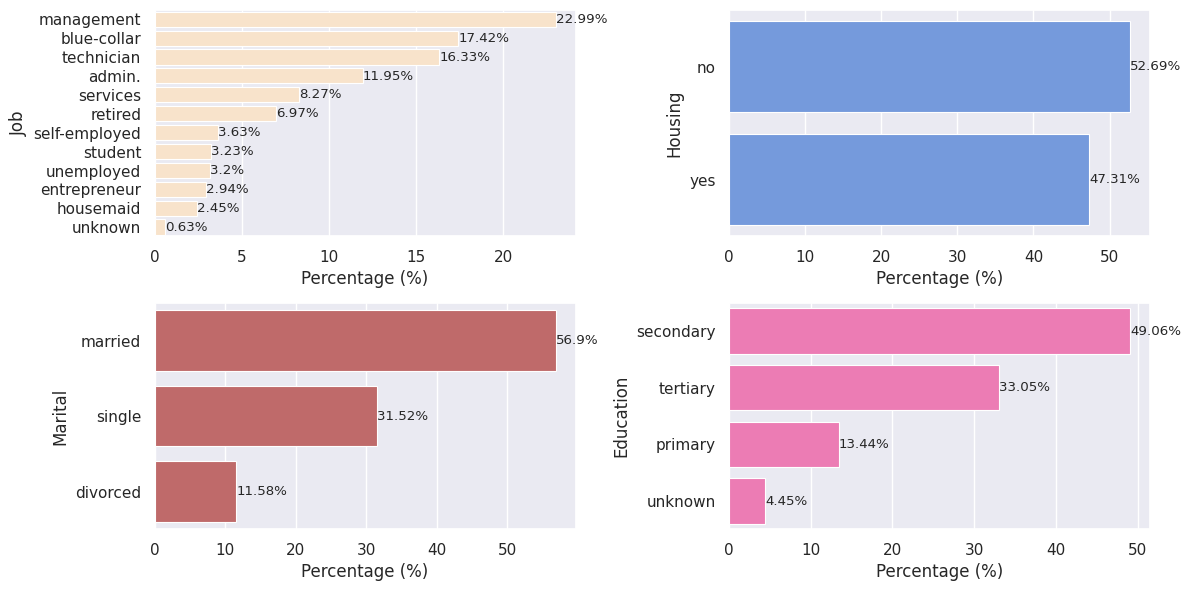

In [47]:
# Create the subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Create individual plots
counts_plot('job', ax=ax1, col='bisque')
counts_plot('housing', ax=ax2, col='cornflowerblue')
counts_plot('marital', ax=ax3, col='indianred')
counts_plot('education', ax=ax4, col='hotpink')

# Adjust layout and display
fig.tight_layout()
plt.show()

<h4> 5.1.2) Default, Loan, Contact and Poutcome Distributions </h4>

/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):
/tmp/ipykernel_49363/2720063542.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_data):


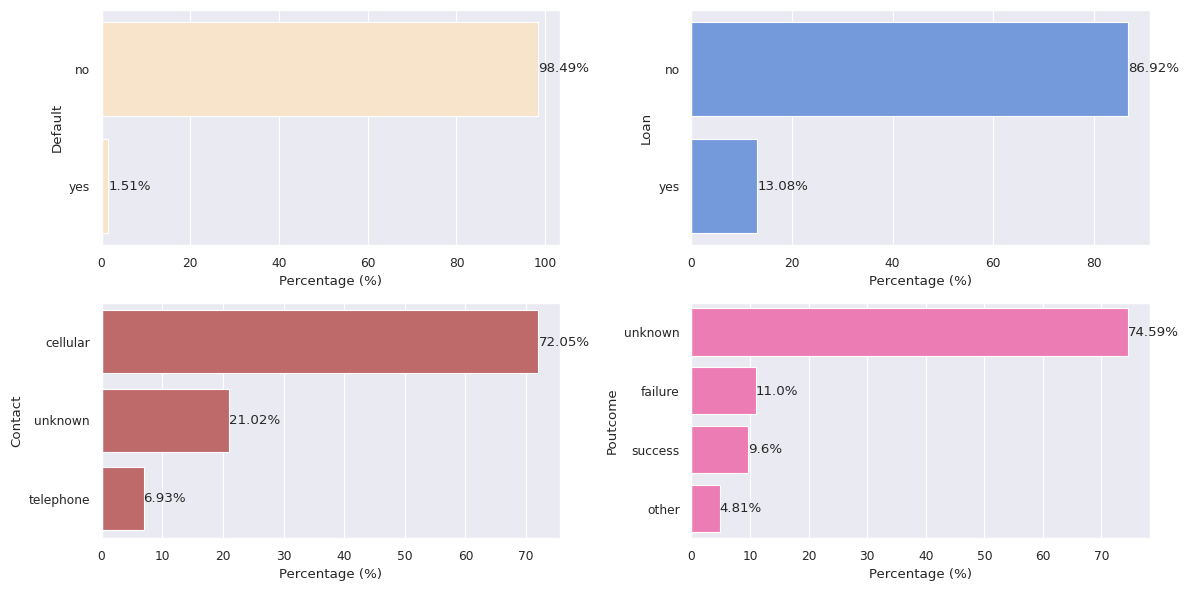

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (12, 6))
counts_plot('default', ax=ax1, col='bisque')
counts_plot('loan', ax=ax2, col= 'cornflowerblue')
counts_plot('contact', ax=ax3, col='indianred')
counts_plot('poutcome', ax=ax4, col='hotpink')
fig.tight_layout()
plt.show()

<h3> 5.1.3) Contact Features </h3>

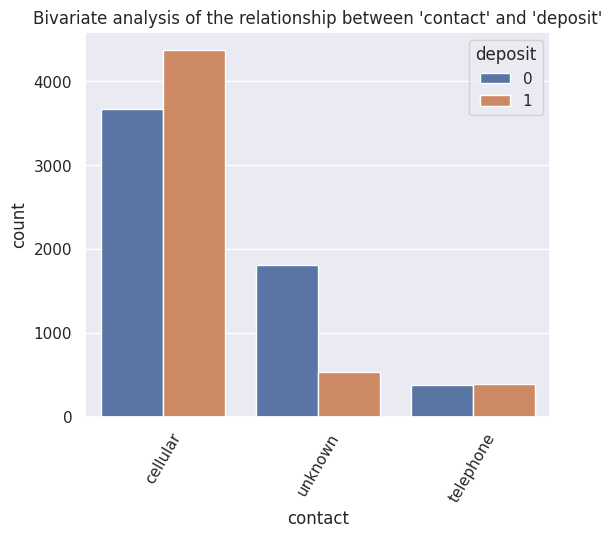

In [49]:
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = data, hue = "deposit", order = data["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'contact' and 'deposit'")
plt.show()

The direct ratio in this graph shows that people who were contacted by cellular got subscribed more to a deposit term.

<h3> 5.2) Target Variable </h3>

<h4> 5.2.1) Target Variable Counts </h4>

In [54]:
# Method 1: Step by step for clarity
# Get value counts
counts = data["deposit"].value_counts()

# Convert to dataframe
y = pd.DataFrame({
    'deposit': counts.index,
    'counts': counts.values
})

# Add percentages
y['percent'] = (y['counts'] / y['counts'].sum() * 100).round(2)

print(y)

# Method 2: Chained operations
y = (
    data["deposit"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={
        "index": "deposit",
        "deposit": "counts"
    })
    .assign(percent=lambda df: (df["counts"] / df["counts"].sum() * 100).round(2))
)

print(y)

# Method 3: Using value_counts with normalize
counts = data["deposit"].value_counts()
percentages = data["deposit"].value_counts(normalize=True) * 100

y = pd.DataFrame({
    'deposit': counts.index,
    'counts': counts.values,
    'percent': percentages.values.round(2)
})

print(y)


   deposit  counts  percent
0        0    5873    52.62
1        1    5289    47.38
   counts  count  percent
0       0   5873      0.0
1       1   5289    100.0
   deposit  counts  percent
0        0    5873    52.62
1        1    5289    47.38


<h4> 5.2.2) Target Variable Proportion (PIE CHART) </h4>

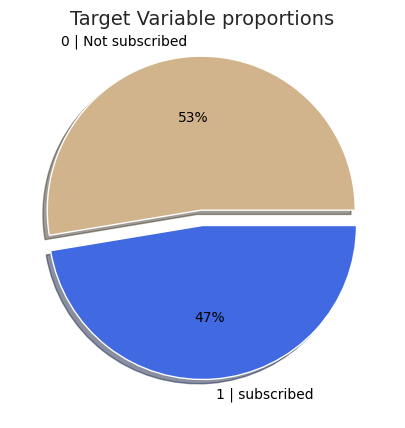

In [55]:
target_color = sns.color_palette(['tan', 'royalblue'])

plt.pie(
    x = (y['counts'] / y['counts'].sum()) * 100,
    labels = ["0 | Not subscribed", "1 | subscribed"],
    colors=target_color,
    autopct="%.0f%%",
    shadow=True, 
    textprops = {"fontsize": 10, "color": "#000000"},
    explode=[0.1, 0],
)

plt.title("Target Variable proportions", fontsize=14)
plt.show()

<h3> 5.3) Numerical features analysis </h3>

<h4> 5.3.1) Numerical features (pairplot) </h4>

/tmp/ipykernel_49363/1500340408.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_for_pairplot = numeric_features.groupby("deposit", group_keys=False).apply(


<function matplotlib.pyplot.show(close=None, block=None)>

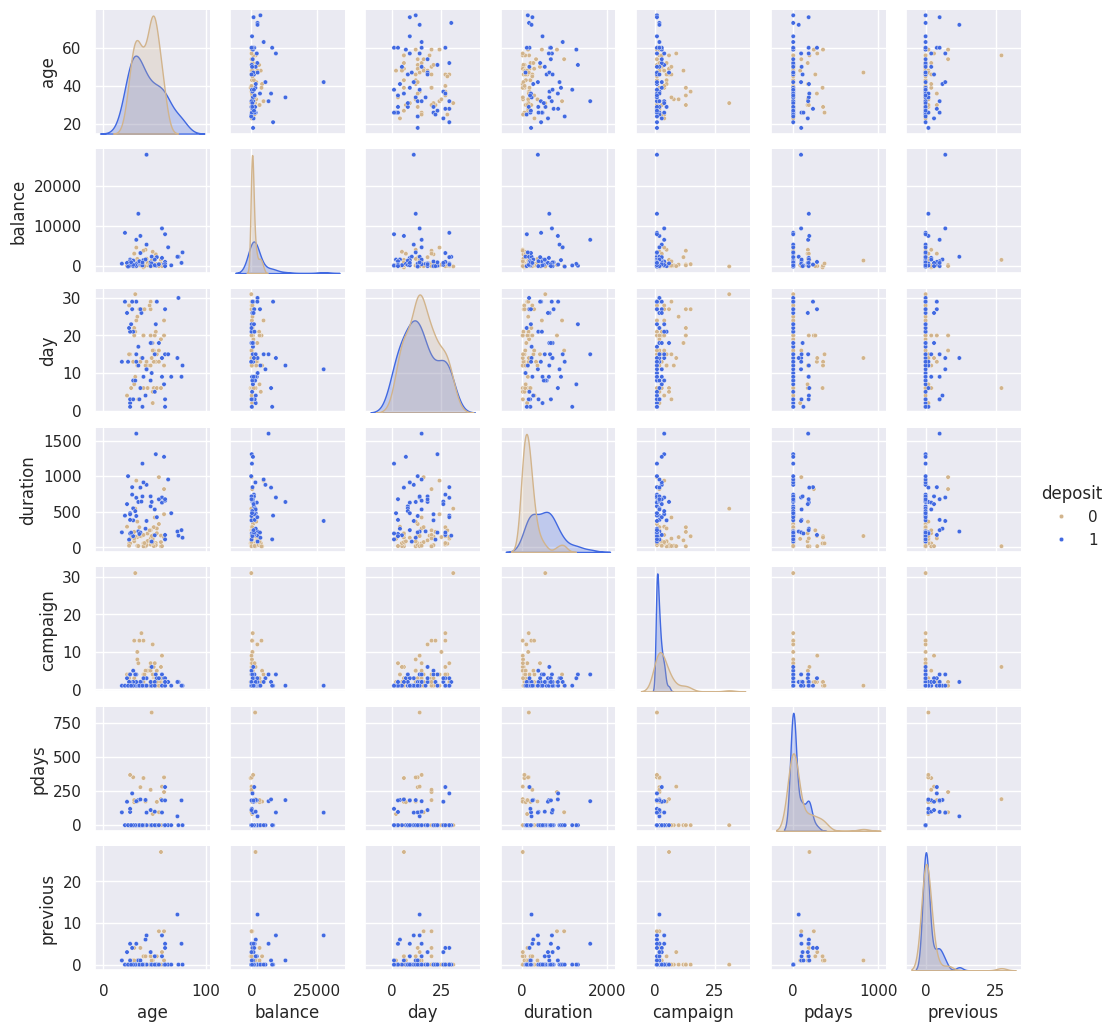

In [56]:
numeric_features = data.select_dtypes("integer").copy()

sample_for_pairplot = numeric_features.groupby("deposit", group_keys=False).apply(
    lambda x: x.sample(frac=0.01)
)

sns.pairplot(
    sample_for_pairplot,
    hue = 'deposit',
    kind= "scatter",
    diag_kind='kde',
    palette=target_color,
    height=1.5,
    aspect= 1,
    plot_kws=dict(s=10)
)
plt.show

<h4> 5.3.2) Age, Duration, Balance, and Campaign Variable </h4>

<h5> 5.3.2.1) Function </h5>

In [57]:
def num_distributions(var_1, var_2):

    age_dur = data[[var_1, var_2, "deposit"]]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ## HistPlot

    sns.histplot(
        data=age_dur,
        kde=True,
        line_kws={"lw": 1.5, "alpha": 0.6},
        x=var_1,
        bins=20,
        hue="deposit",
        palette=target_color,
        alpha=0.6,
        ax=ax1,
    )
    ax1.legend(
        title="Subscribed?",
        loc="upper right",
        labels=["YES", "NO"],
        ncol=2,
        frameon=True,
        shadow=True,
        title_fontsize=8,
        prop={"size": 7},
        bbox_to_anchor=(1.18, 1.25),
    )
    ax1.set_xlabel(str.title(var_1), fontsize=10)
    ax1.set_ylabel("Frequency", fontsize=10)
    ax1.set_title(str.title(var_1) + " distributions", fontsize=12)
    ax1.yaxis.set_major_formatter(ticker.EngFormatter())

    ## Scatter plot

    sns.scatterplot(
        data=age_dur,
        x=var_1,
        y=var_2,
        hue="deposit",
        ax=ax2,
        palette=target_color,
        legend=False,
        alpha=0.6,
    )
    ax2.yaxis.set_major_formatter(ticker.EngFormatter())
    ax2.set_title(str.title(var_2) + " distributions", fontsize=12)
    ax2.set_ylabel(str.title(var_2), fontsize=10)
    ax2.set_xlabel(str.title(var_1), fontsize=10)

    return

<h5> 5.3.2.2) Age and Duration </h5>

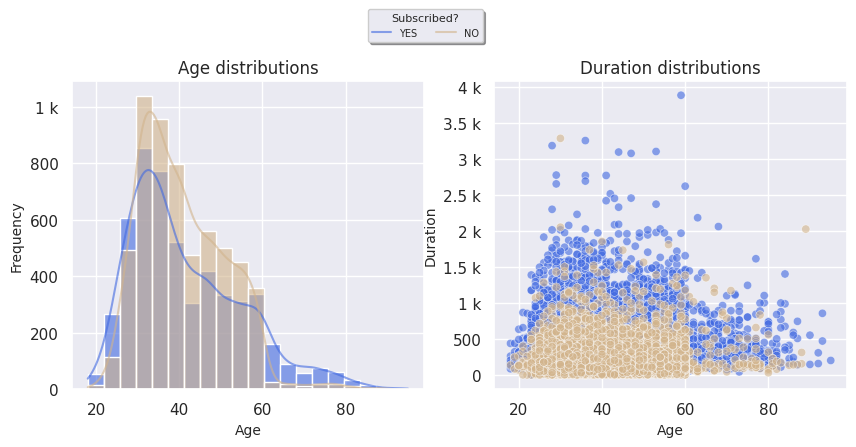

In [58]:
num_distributions("age", "duration")

<h5> 5.3.2.3) Age and Balance </h5>

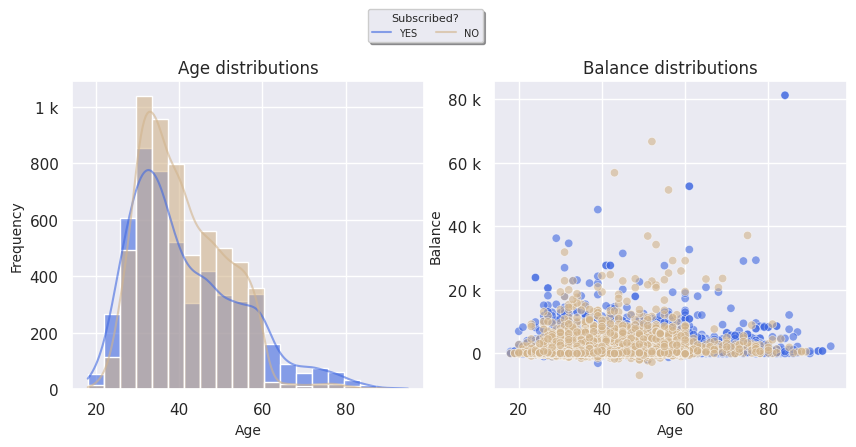

In [59]:
num_distributions("age", "balance")

<h5> 5.3.2.4) Balance and Duration </h5>

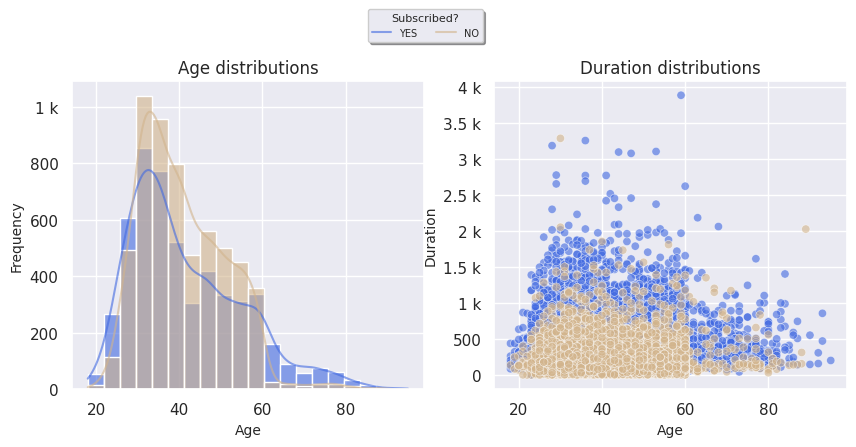

In [60]:
num_distributions("age", "duration")

<h5> 5.3.2.5) Balance and Campaign </h5>

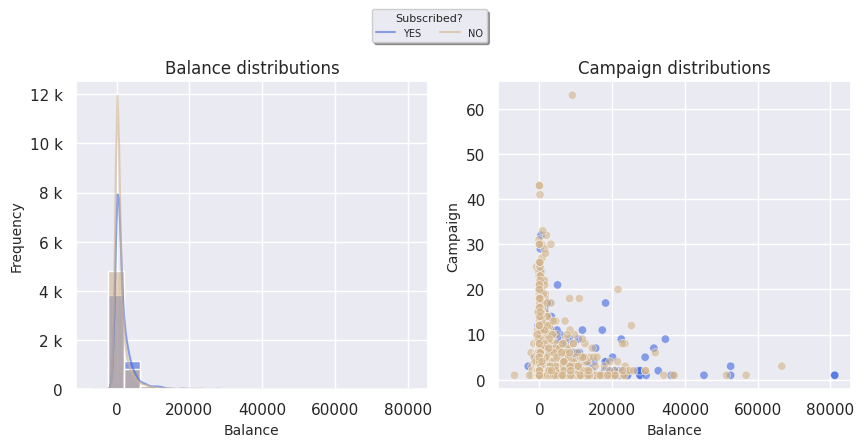

In [61]:
num_distributions("balance", "campaign")

Who talks more ? 

In [62]:
larg_dur = data["duration"].nlargest(10)
small_dur = data["duration"].nsmallest(5)
data.query("duration in @larg_dur | duration in @small_dur").sort_values(
    by="duration", ascending=False
).style.background_gradient()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,1
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,0
883,36,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,1
358,28,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,-1,0,unknown,1
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,1
153,44,services,divorced,secondary,no,51,yes,yes,unknown,27,may,3094,2,-1,0,unknown,1
1351,47,blue-collar,married,secondary,no,238,yes,yes,cellular,13,mar,3076,1,-1,0,unknown,1
1179,29,technician,married,secondary,no,273,no,no,cellular,4,feb,2775,2,-1,0,unknown,1
1106,41,management,single,secondary,no,3234,yes,no,cellular,30,jan,2770,1,-1,0,unknown,1
306,36,entrepreneur,married,tertiary,no,3057,no,no,unknown,16,jun,2769,4,-1,0,unknown,1


<h5> 5.3.2.6) Default and target Variable "y" </h5>

In [63]:
y = (
    data[["default", "deposit"]]
    .value_counts()
    .reset_index()
    .rename(columns={0: "counts"})
)

print(y)

  default  deposit  count
0      no        0   5757
1      no        1   5237
2     yes        0    116
3     yes        1     52


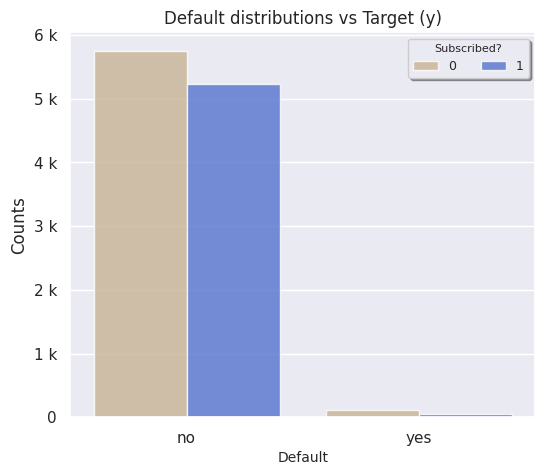

In [64]:
default_and_target = (
    data[["default", "deposit"]]
    .value_counts()
    .reset_index()
    .rename(columns={0: "counts"})
)

fig, ax = plt.subplots(1, 1)

sns.barplot(
    data=default_and_target,
    x="default",
    y="count",
    hue="deposit",
    palette=target_color,
    alpha=0.8,
)
ax.set_title("Default distributions vs Target (y)", fontsize=12)
ax.set_ylabel("Counts")
ax.set_xlabel("Default", fontsize=10)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.legend(
    title="Subscribed?",
    loc="upper right",
    ncol=2,
    frameon=True,
    shadow=True,
    title_fontsize=8,
    prop={"size": 9},
)
plt.show()

<h5> 5.3.2.7) Default, Balance and target Variable "y" </h5>

In [65]:
y = (
    data[["balance", "default", "deposit"]]
    .groupby(["default", "deposit"])["balance"]
    .agg(["mean", "count"])
    .reset_index()
)

print(y)

  default  deposit         mean  count
0      no        0  1307.270974   5757
1      no        1  1822.793775   5237
2     yes        0   -61.939655    116
3     yes        1   -61.500000     52


/tmp/ipykernel_49363/2904112672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["default", "deposit"])["balance"]


<h2> 6) Model </h2>

In [66]:
X = data.iloc[:, :16]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h3> 6.1) Encoding </h3>

In [67]:
binary_columns = list(X_train.select_dtypes(include="category").columns.values)
binary_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [68]:
# I remove educational variable be cause he was encoded as an ordinal type
binary_columns.remove("education")
binary_columns



['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [69]:
X_train = pd.get_dummies(
    X_train, prefix=binary_columns, columns=binary_columns, drop_first=True
)
X_train.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2265,55,secondary,1662,4,94,2,-1,0,False,False,...,False,True,False,False,False,False,False,False,False,True
1525,39,tertiary,-3058,17,882,3,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1837,51,secondary,3025,7,476,1,352,1,False,False,...,False,False,False,True,False,False,False,True,False,False
9423,38,primary,-87,13,531,1,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True
8111,36,secondary,205,18,176,4,-1,0,False,False,...,False,False,False,False,True,False,False,False,False,True


In [70]:
recode_education_var = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
X_train["education"] = X_train["education"].replace(recode_education_var)
X_train["education"].value_counts(normalize=True)

/tmp/ipykernel_49363/1264777765.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train["education"] = X_train["education"].replace(recode_education_var)
/tmp/ipykernel_49363/1264777765.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_train["education"] = X_train["education"].replace(recode_education_var)


education
2    0.491617
3    0.330347
1    0.132983
0    0.045053
Name: proportion, dtype: float64

In [71]:
X_test = pd.get_dummies(
    X_test, prefix=binary_columns, columns=binary_columns, drop_first=True
)
X_test.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
9058,41,unknown,88,11,105,1,336,2,False,False,...,False,False,False,True,False,False,False,False,False,False
3279,56,secondary,1938,26,229,1,192,4,False,False,...,False,False,False,False,False,False,False,False,True,False
6502,30,secondary,245,8,187,2,-1,0,False,False,...,True,False,False,False,False,False,False,False,False,True
9327,34,tertiary,1396,17,630,1,-1,0,False,False,...,True,False,False,False,False,False,False,False,False,True
9965,29,secondary,-13,14,512,3,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [72]:
X_test["education"] = X_test["education"].replace(recode_education_var)

/tmp/ipykernel_49363/2700105684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["education"] = X_test["education"].replace(recode_education_var)
/tmp/ipykernel_49363/2700105684.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_test["education"] = X_test["education"].replace(recode_education_var)


<h3> 6.2) Random Forest Model </h3>

In [73]:
rf = RandomForestClassifier(
    n_jobs=-1, random_state=0, class_weight="balanced_subsample"
)

In [74]:
rs = make_scorer(recall_score)

In [75]:
cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.85294118 0.87700535 0.87131367 0.8847185  0.88739946 0.90616622
 0.87131367 0.8847185  0.89276139 0.86595174]
0.88 recall with a standard deviation of 0.01


In [76]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
pred = rf.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 4)))

The train recall score is 1.0


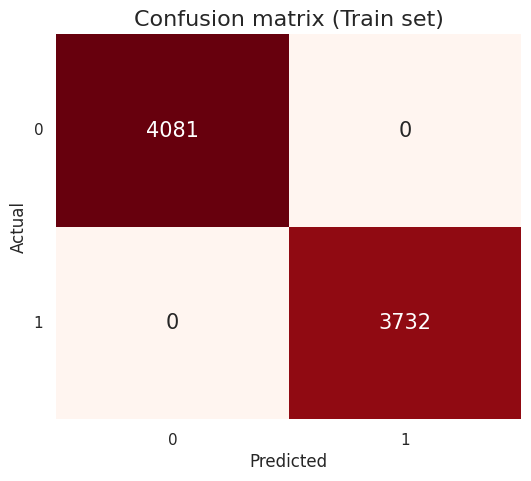

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4081
           1       1.00      1.00      1.00      3732

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813



In [78]:
sns.heatmap(
    confusion_matrix(y_train, pred),
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Train set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_train, pred))

In [79]:
pred = rf.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 4)))

The test recall score is 0.8805


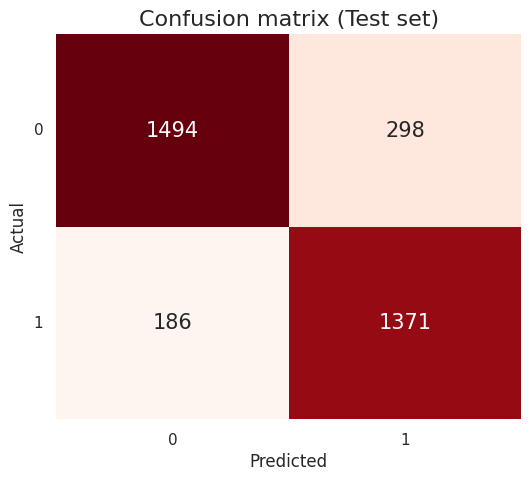

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1792
           1       0.82      0.88      0.85      1557

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [80]:
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    fmt="g",
    cmap="Reds",
    cbar=False,
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test, pred))

<h3> 6.3) Logistic Regression </h3>

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, accuracy_score

# Define the pipeline steps
pipeline_steps = [
    ('scaler', StandardScaler()),  # Step 1: Default to StandardScaler, can be changed in GridSearchCV
    ('logreg', LogisticRegression())  # Step 2: Logistic Regression
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

# Define the hyperparameters and their ranges
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

# Define the scorer
scorer = make_scorer(accuracy_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


/home/cruchau/projects/github_input/bank-client-classification/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cruchau/projects/github_input/bank-client-classification/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also wan

Best parameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'scaler': StandardScaler()}
Best score: 0.8241395327118882
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1792
           1       0.83      0.79      0.81      1557

    accuracy                           0.83      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.83      0.83      0.83      3349



/home/cruchau/projects/github_input/bank-client-classification/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cruchau/projects/github_input/bank-client-classification/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cruchau/projects/github_input/bank-client-classification/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
   

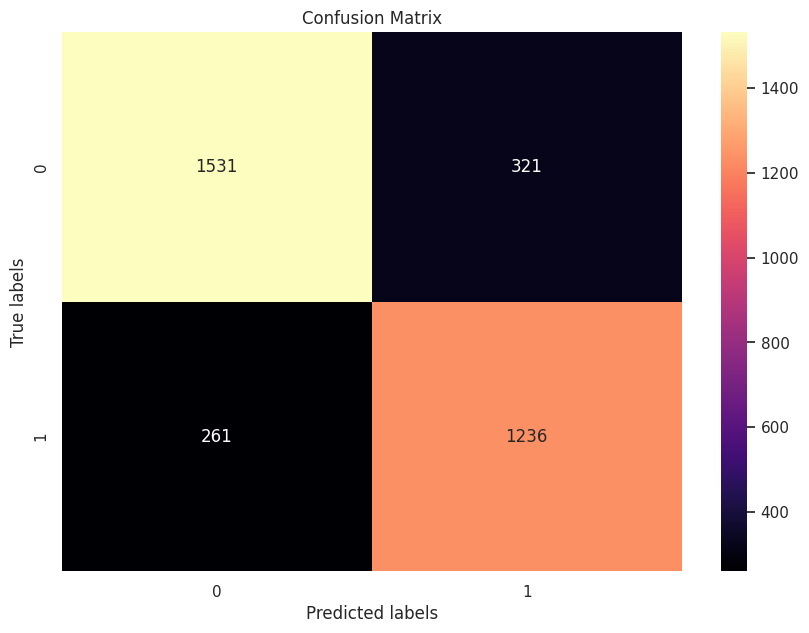

In [82]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="g", cmap="magma")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Something to think: <br>
<ul>
    <li> We can fill unknown job values with mode value but also we can fill unknown job values with mode of education degree per job. </li>
    <li> We can fill unknown values at education column </li>
    <li> We can fill unknown values at contact with mode </li>
    <li> Maybe we can remove the column "ID", "day", and "month </li>
<ul>

<h2> 7) Handle Unknown Values </h2>

In [83]:
data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Has we saw previously, it's look like dataset has no "NaN" values but dataset has "unknown" values. <br>

We can fill unknown job values with mode value but also we can fill unknown job values with mode of education degree per job.

<h3> 7.1) eduRatio => Handle Job Unknow Values

<h4> Step 1: Calculate the Most Common Education Level and Its Percentage for Each Job Type </h4>

In [84]:
# Step 1: Find the most common education level for each job type
eduRatio = pd.DataFrame()
for job_type in data["job"].unique():
    job_data = data[data["job"] == job_type]["education"]
    most_common_education = job_data.mode()[0]  # Find the most common education level
    most_common_pct = job_data.value_counts(normalize=True).iloc[0] * 100  # Find the percentage of the most common education level
    new_row = pd.DataFrame({'Job': [job_type], 'MostCommonEducation': [most_common_education], 'MostCommonEducationPct': [most_common_pct]})
    eduRatio = pd.concat([eduRatio, new_row], ignore_index=True)
eduRatio

,Job,MostCommonEducation,MostCommonEducationPct
0,admin.,secondary,81.259370
1,technician,secondary,66.319254
2,services,secondary,80.823402
3,management,tertiary,84.879189
4,retired,secondary,40.359897
5,blue-collar,secondary,57.407407
6,unemployed,secondary,58.823529
7,entrepreneur,secondary,42.987805
8,housemaid,primary,52.554745
9,unknown,unknown,55.714286


<h4> Step 2: Impute 'Unknown' Job Types Based on the Most Common Education Level </h4>

In [85]:
# Step 2: Use this information to impute 'unknown' job types
for edu_level in data[data['job'] == 'unknown']['education'].unique():
    # Find the job type whose most common education level matches 'edu_level'
    matching_job = eduRatio[eduRatio['MostCommonEducation'] == edu_level]['Job'].iloc[0]
    # Fill in 'unknown' job types with the 'matching_job' for rows where education level is 'edu_level'
    data.loc[(data['job'] == 'unknown') & (data['education'] == edu_level), 'job'] = matching_job

data['job'].value_counts()

job
management       2575
blue-collar      1944
technician       1823
admin.           1349
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         281
unknown            39
Name: count, dtype: int64

<h4> Step 3: For Any Remaining 'Unknown' Job Values, Use a Weighted Random Choice Based on MostCommonEducationPct </h4>

In [86]:
import random

# Step 3: For any remaining 'unknown' job values, use a weighted random choice based on MostCommonEducationPct
# Normalize the percentages to sum to 1 (probabilities)
eduRatio['NormalizedPct'] = eduRatio['MostCommonEducationPct'] / eduRatio['MostCommonEducationPct'].sum()
job_weights = eduRatio.set_index('Job')['NormalizedPct'].to_dict()

# For each 'unknown' job, assign a job type based on the weighted distribution
for idx in data[data['job'] == 'unknown'].index:
    data.at[idx, 'job'] = random.choices(list(job_weights.keys()), weights=job_weights.values(), k=1)[0]

data['job'].value_counts()

job
management       2578
blue-collar      1950
technician       1827
admin.           1354
services          929
retired           780
self-employed     408
unemployed        362
student           360
entrepreneur      328
housemaid         283
unknown             3
Name: count, dtype: int64

<h4> Step 4: Assign a Default Job Type to Any Remaining 'Unknown' Job Entries </h4>

In [87]:
# Define a default job type
default_job_type = 'blue-collar'  # or any other job type based on your analysis or domain knowledge

# Assign the default job type to any remaining 'unknown' job entries
data.loc[data['job'] == 'unknown', 'job'] = default_job_type

# Verify that there are no more 'unknown' job values
print(data['job'].value_counts())


job
management       2578
blue-collar      1953
technician       1827
admin.           1354
services          929
retired           780
self-employed     408
unemployed        362
student           360
entrepreneur      328
housemaid         283
unknown             0
Name: count, dtype: int64


<h3> 7.2) eduRatio => Handle Education Unknown Values </h3>

In [88]:
data["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [89]:
job_education_mapping = {
    "admin.": "secondary",
    "management": "secondary",
    "services": "tertiary",
    "technician": "secondary",
    "retired": "secondary",
    "blue-collar": "secondary",
    "housemaid": "primary",
    "self-employed": "tertiary",
    "student": "secondary",
    "entrepreneur": "tertiary",
    "unemployed": "secondary",
    # Add more mappings if needed
}

for job_type, education_level in job_education_mapping.items():
    condition = (data.education == "unknown") & (data.job == job_type)
    data.loc[condition, "education"] = education_level

# For any remaining 'unknown' education values, set them to 'secondary'
data.loc[data.education == "unknown", "education"] = "secondary"

# Verify that there are no more 'unknown' education values
print(data['education'].value_counts())

education
secondary    5887
tertiary     3764
primary      1511
unknown         0
Name: count, dtype: int64


<h3> 7.3) Contact Unknown Values </h3>

In [90]:
data['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [91]:
data["contact"].replace(["unknown"],data["contact"].mode(),inplace = True) # I replace unknown contact values with mode value
data['contact'].value_counts()

/tmp/ipykernel_49363/1940128859.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["contact"].replace(["unknown"],data["contact"].mode(),inplace = True) # I replace unknown contact values with mode value
/tmp/ipykernel_49363/1940128859.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data["contact"].replace

contact
cellular     10388
telephone      774
Name: count, dtype: int64

<h3> 7.4) No need Day, and Month columns

In [92]:
data.drop(columns = ["day","month"],inplace = True)

<h2> 8) Redo basic </h2>

In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,cellular,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,cellular,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,cellular,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,cellular,673,2,-1,0,unknown,1


<h3> 8.1) Splitting Data </h3>

In [94]:
X = data.iloc[:, :14]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3> 8.2) Encoding </h3>

In [95]:
binary_columns = list(X_train.select_dtypes(include="category").columns.values)
binary_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [96]:
# I remove educational variable be cause he was encoded as an ordinal type
binary_columns.remove("education")
binary_columns


['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [97]:
X_train = pd.get_dummies(
    X_train, prefix=binary_columns, columns=binary_columns, drop_first=True
)
X_train.head()

,age,education,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown
6111,49,secondary,104,285,1,-1,0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
1149,59,secondary,514,261,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2954,33,primary,195,984,5,-1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
2458,58,secondary,687,221,1,99,2,False,False,False,...,False,True,False,False,True,False,False,False,True,False
7504,33,secondary,1077,432,3,374,3,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [98]:
recode_education_var = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
X_train["education"] = X_train["education"].replace(recode_education_var)
X_train["education"].value_counts(normalize=True)

/tmp/ipykernel_49363/1264777765.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train["education"] = X_train["education"].replace(recode_education_var)
/tmp/ipykernel_49363/1264777765.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_train["education"] = X_train["education"].replace(recode_education_var)


education
2    0.529175
3    0.335760
1    0.135066
0    0.000000
Name: proportion, dtype: float64

In [99]:
X_test = pd.get_dummies(
    X_test, prefix=binary_columns, columns=binary_columns, drop_first=True
)
X_test.head()

,age,education,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown
9058,41,tertiary,88,105,1,336,2,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3279,56,secondary,1938,229,1,192,4,False,False,False,...,False,True,False,False,False,True,False,False,True,False
6502,30,secondary,245,187,2,-1,0,False,False,False,...,False,False,True,False,False,True,False,False,False,True
9327,34,tertiary,1396,630,1,-1,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
9965,29,secondary,-13,512,3,-1,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [100]:
X_test["education"] = X_test["education"].replace(recode_education_var)

/tmp/ipykernel_49363/2700105684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["education"] = X_test["education"].replace(recode_education_var)
/tmp/ipykernel_49363/2700105684.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X_test["education"] = X_test["education"].replace(recode_education_var)


<h3> 8.3) Random Forest </h3>

In [101]:
rf = RandomForestClassifier(
    n_jobs=-1, random_state=0, class_weight="balanced_subsample"
)

In [102]:
rs = make_scorer(recall_score)

In [103]:
cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.82159624 0.82159624 0.81220657 0.8286385  0.81924883 0.81220657
 0.84507042 0.8028169  0.83372365 0.82629108]
0.82 recall with a standard deviation of 0.01


In [104]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [105]:
pred = rf.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 4)))

The train recall score is 1.0


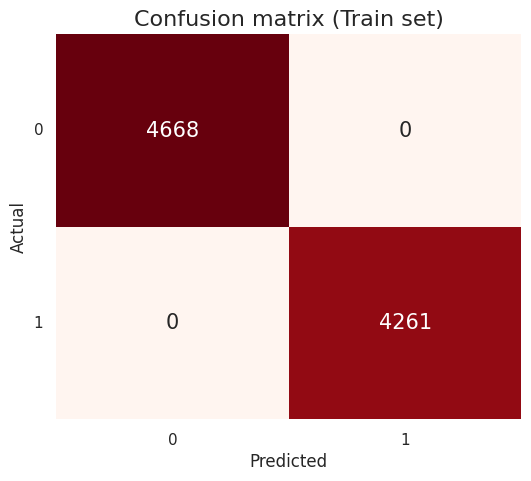

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4668
           1       1.00      1.00      1.00      4261

    accuracy                           1.00      8929
   macro avg       1.00      1.00      1.00      8929
weighted avg       1.00      1.00      1.00      8929



In [106]:
sns.heatmap(
    confusion_matrix(y_train, pred),
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Train set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_train, pred))

In [107]:
pred = rf.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 4)))

The test recall score is 0.8152


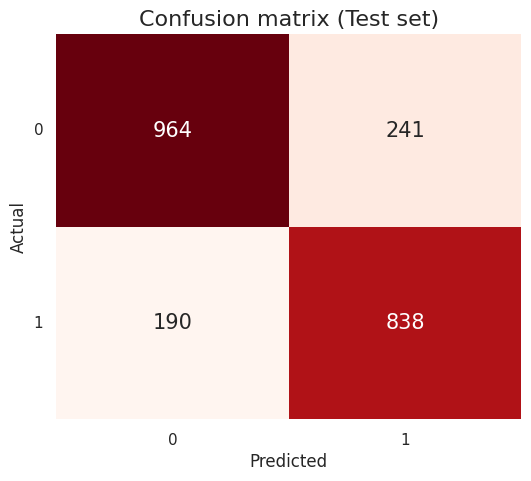

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1205
           1       0.78      0.82      0.80      1028

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [108]:
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    fmt="g",
    cmap="Reds",
    cbar=False,
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test, pred))

<h3> 8.4) Logistic Regression </h3>

In [109]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [111]:
from sklearn import metrics

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


[[1011  248]
 [ 194  780]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1205
           1       0.80      0.76      0.78      1028

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

Accuracy: 0.8020600089565607
Precision: 0.8008213552361396
Recall: 0.7587548638132295


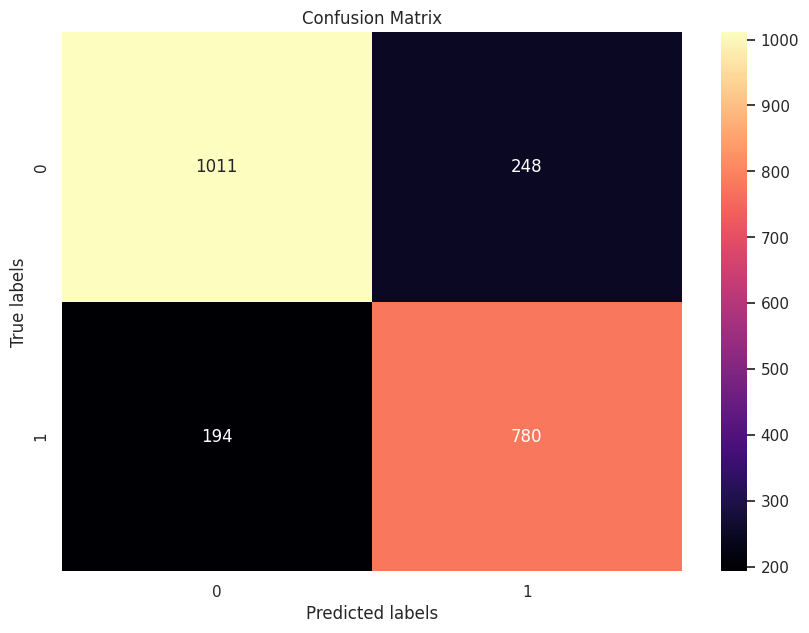

In [112]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="g", cmap="magma")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()